# Enter your details in the cells below

## JIMMY KODWO ESSEL

### ekjimmy@yahoo.com

#  Project
### Problem Statement

Buymore is a fast growing supermarket in Ghana that is taking advantage of the data revolution to make data driven decisions.
As their Data Scientist, you are presented with the 2013 daily sales records (Buymore_sales_data.csv) and tasked to help them find answers to the questions below by analysing the given data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the average sales and profit per market.
   
   iii.Which market brings more sales on the average?


2. i. Extract the days(eg:Monday,Tuesday...) and months(eg:January,February...) from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii.  Based on the data, which day does the company make high sales on the average?

3. i. What is the correlation between sales and profit, what does that mean?

   ii. Use a scatter plot to show the relationship between sales and profit.

4. i. Plot a grouped bar chart showing the total profit for the different product category(Category) for each market.

   ii. From your graph, which product category performs well in each market?

#### Notes:
* Add titles and labels to your charts.
* Use markdowns to write your answers or findings where necessary.
* Use comments to exlain you codes where necessary 
* Remember to import the necessary packages

**Thank you**

**GOOD LUCK!**





#### **NB**: To easily load the data, it's advisable you have the data and the notebook file  in the same folder

In [286]:
#import your packages here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [287]:
#reading given csv file (dataset) 
data =pd.read_csv("Buymore_sales_data.csv")
data.head()

,Order Date,Order ID,Market,Category,Sales,Quantity,Profit
0,2013-01-01,ID-2013-37383,Kumasi,Technology,1649.214,7,36.624
1,2013-01-01,IN-2013-47960,Kumasi,Furniture,1358.280,7,203.700
2,2013-01-01,ID-2013-37383,Kumasi,Technology,728.568,8,-32.472
3,2013-01-01,IN-2013-47960,Kumasi,Furniture,2189.520,6,372.060
4,2013-01-01,IN-2013-47960,Kumasi,Furniture,1362.060,7,340.410


In [288]:
# Load the sales data here
sales_df = data["Sales"]
#sales_df.head()

## QUESTION 1

In [289]:
#grouping data by Market and finding the mean profit of each market group
mean_sales=data.groupby("Market")["Sales"].agg(["mean"])
mean_sales_top = mean_sales.head()

#converting mean sales indices to a list for esy manipulation
x_cord = list(mean_sales_top.index)
y_sales = mean_sales["mean"].tolist()
#mean_sales.head()

In [290]:
#loading the profit column of the data
profit_df = data["Profit"]
profit_df.head()

0     36.624
1    203.700
2    -32.472
3    372.060
4    340.410
Name: Profit, dtype: float64

In [291]:
#grouping data by Market and finding the mean profit of each market group
mean_profit=data.groupby("Market")["Profit"].agg(["mean"])
y_profits = mean_profit["mean"].tolist()

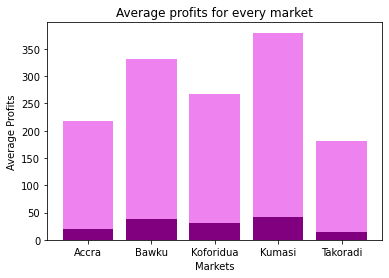

In [292]:
#ploting bar chart
plt.bar(x_cord, y_profits, color="purple")
plt.bar(x_cord, y_sales, bottom=y_profits,color="violet")

#labelling bar chart
plt.xlabel("Markets")
plt.ylabel("Average Profits")
plt.title("Average profits for every market")
plt.show()

**III.** The market that brings the most sales on average is **KUMASI MARKET**

## QUESTION 2

In [293]:
#Extracting days and monhs from the dates in the dataset and adding them as colums to he dataset

data["Days"]= pd.to_datetime(data["Order Date"]).dt.day_name()

data["Months"]= pd.to_datetime(data["Order Date"]).dt.month_name()
#data.head()

Text(0.5, 1.0, 'Average profits for every day of the week')

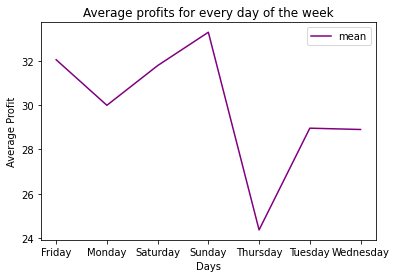

In [294]:
#groupby function groups the rows based on th specified parameter (days and months in this case)
daily_profit=data.groupby("Days")["Profit"].agg(["mean"])
monthly_profit=data.groupby("Months")["Profit"].agg(["sum"])

#draws line chart
daily_profit.plot(color="purple")

#labelling line chart
plt.xlabel("Days")
plt.ylabel("Average Profit")
plt.title("Average profits for every day of the week")

III. The company makes high average sales on **Sunday**

## QUESTION 3

**I.** Positive correlation

**II.** This means that an increase in sales causes an increase in profit and vice versa

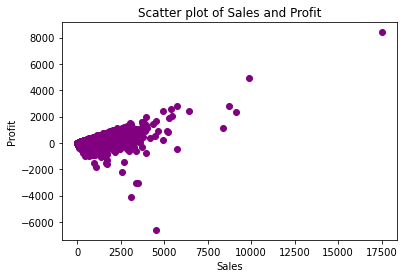

In [295]:
#plotting a scatter diagram with sales as x and profit as y
plt.scatter(data["Sales"],data["Profit"], color="purple")

#labelling scatter plot
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Scatter plot of Sales and Profit")
plt.show()

## QUESTION 4

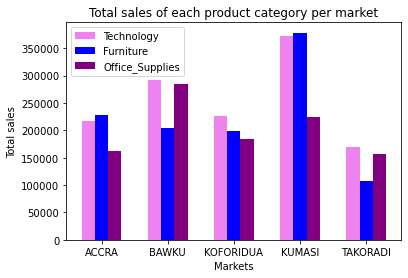

In [300]:
#list of values to be used as x coordinates
markets = x_cord
product_category = list(set(data["Category"]))

#lists to contain values that will be used to draw the bar chat
MARKET =[]
Technology=[]
Furniture =[]
Office_Supplies=[]

#loop that adds the appropriate value(s) to the each list above
for market in markets:
    for category in product_category:
        #details.append(market)
        tot_sales=data.loc[(data["Market"]==market)&(data["Category"]==category),"Sales"].sum()
        if category == "Technology":
            Technology.append(tot_sales)
        elif category == "Furniture":
             Furniture.append(tot_sales)
        else: 
            Office_Supplies.append(tot_sales)
    MARKET.append(market)

#list comprehension that converts each member of the MARKET list o upper case 
MARKETS = [i.upper() for i in MARKET]

#w represents he width of each bar
w=0.2

#the positions of each bar in a group specified in bars 1,2 and 3
bar1 = np.arange(len(MARKETS))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

#plot of the bars
plt.bar(bar1,Technology,w,label="Technology", color="violet")
plt.bar(bar2,Furniture,w,label="Furniture", color="blue")
plt.bar(bar3,Office_Supplies,w,label="Office_Supplies", color="purple")

#labelling the bar chart
plt.xlabel("Markets")
plt.ylabel("Total sales")
plt.title("Total sales of each product category per market")
plt.xticks(bar2,MARKETS)
plt.legend()
plt.show()

**II.** The product category that performs well in:

1. Accra is **Furniture**.
2. Bawku is **Technology**.
3. Koforidua is **Technology**.
4. Kumasi is **Furniture**.
5. Takoradi is **Technology**.